In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings('ignore')


In [2]:
df1 = pd.read_csv('calories.csv') 
df2 = pd.read_csv('exercise.csv') 
  
# print the datasets 
print(df1.head()) 
print(df2.head()) 
concat_data = pd.concat([df1, df2],axis=1) 
print(concat_data) 

    User_ID  Calories
0  14733363     231.0
1  14861698      66.0
2  11179863      26.0
3  16180408      71.0
4  17771927      35.0
    User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0  14733363    male   68   190.0    94.0      29.0       105.0       40.8
1  14861698  female   20   166.0    60.0      14.0        94.0       40.3
2  11179863    male   69   179.0    79.0       5.0        88.0       38.7
3  16180408  female   34   179.0    71.0      13.0       100.0       40.5
4  17771927  female   27   154.0    58.0      10.0        81.0       39.8
        User_ID  Calories   User_ID  Gender  Age  Height  Weight  Duration  \
0      14733363     231.0  14733363    male   68   190.0    94.0      29.0   
1      14861698      66.0  14861698  female   20   166.0    60.0      14.0   
2      11179863      26.0  11179863    male   69   179.0    79.0       5.0   
3      16180408      71.0  16180408  female   34   179.0    71.0      13.0   
4      17771927      35.0  1777192

In [3]:
df = concat_data
df.head()


,User_ID,Calories,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,231.0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,66.0,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,26.0,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,71.0,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,35.0,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [4]:
df.shape


(15000, 10)

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Calories    15000 non-null  float64
 2   User_ID     15000 non-null  int64  
 3   Gender      15000 non-null  object 
 4   Age         15000 non-null  int64  
 5   Height      15000 non-null  float64
 6   Weight      15000 non-null  float64
 7   Duration    15000 non-null  float64
 8   Heart_Rate  15000 non-null  float64
 9   Body_Temp   15000 non-null  float64
dtypes: float64(6), int64(3), object(1)
memory usage: 1.1+ MB


In [6]:
df.describe()


,User_ID,Calories,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
count,1.500000e+04,15000.000000,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,89.539533,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453
std,2.872851e+06,62.456978,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230
min,1.000116e+07,1.000000,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000
25%,1.247419e+07,35.000000,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000
50%,1.499728e+07,79.000000,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000
75%,1.744928e+07,138.000000,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000
max,1.999965e+07,314.000000,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000


In [7]:
print(df.columns)

Index(['User_ID', 'Calories', 'User_ID', 'Gender', 'Age', 'Height', 'Weight',
       'Duration', 'Heart_Rate', 'Body_Temp'],
      dtype='object')


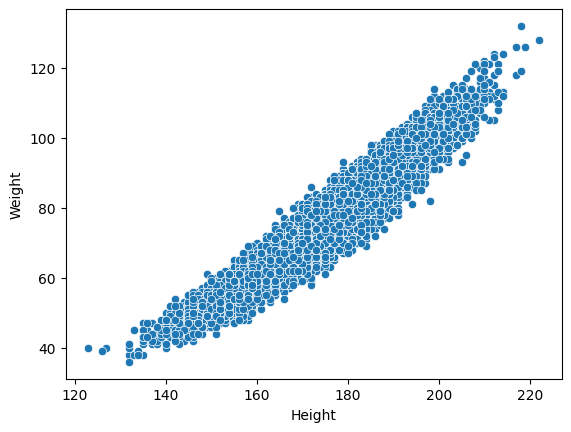

In [8]:
#EDA
sb.scatterplot(x='Height', y='Weight', data=df) 
plt.show()
# kind of an linear relation

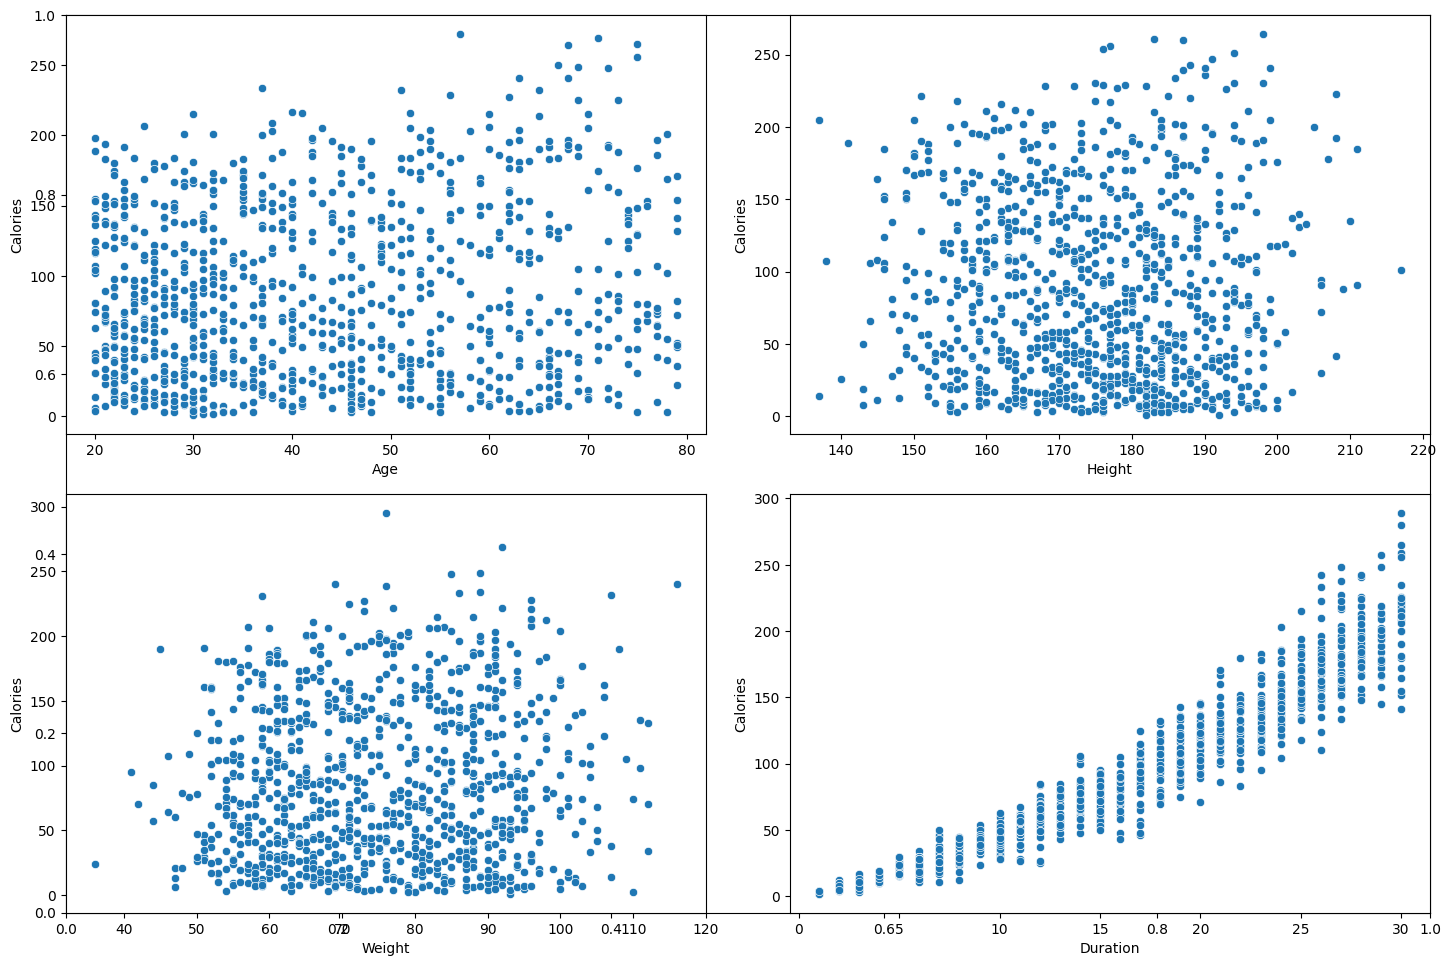

In [9]:
features = ['Age', 'Height', 'Weight', 'Duration']

plt.subplots(figsize=(15, 10))
for i, col in enumerate(features):
    plt.subplot(2, 2, i + 1)
    x = df.sample(1000)
    sb.scatterplot(x=col, y='Calories', data=x)
plt.tight_layout()
plt.show()

# higher the duration of workout higher is the calories burnt 
#But except for that, we cannot observe any such relation between calories burnt and height or weight features


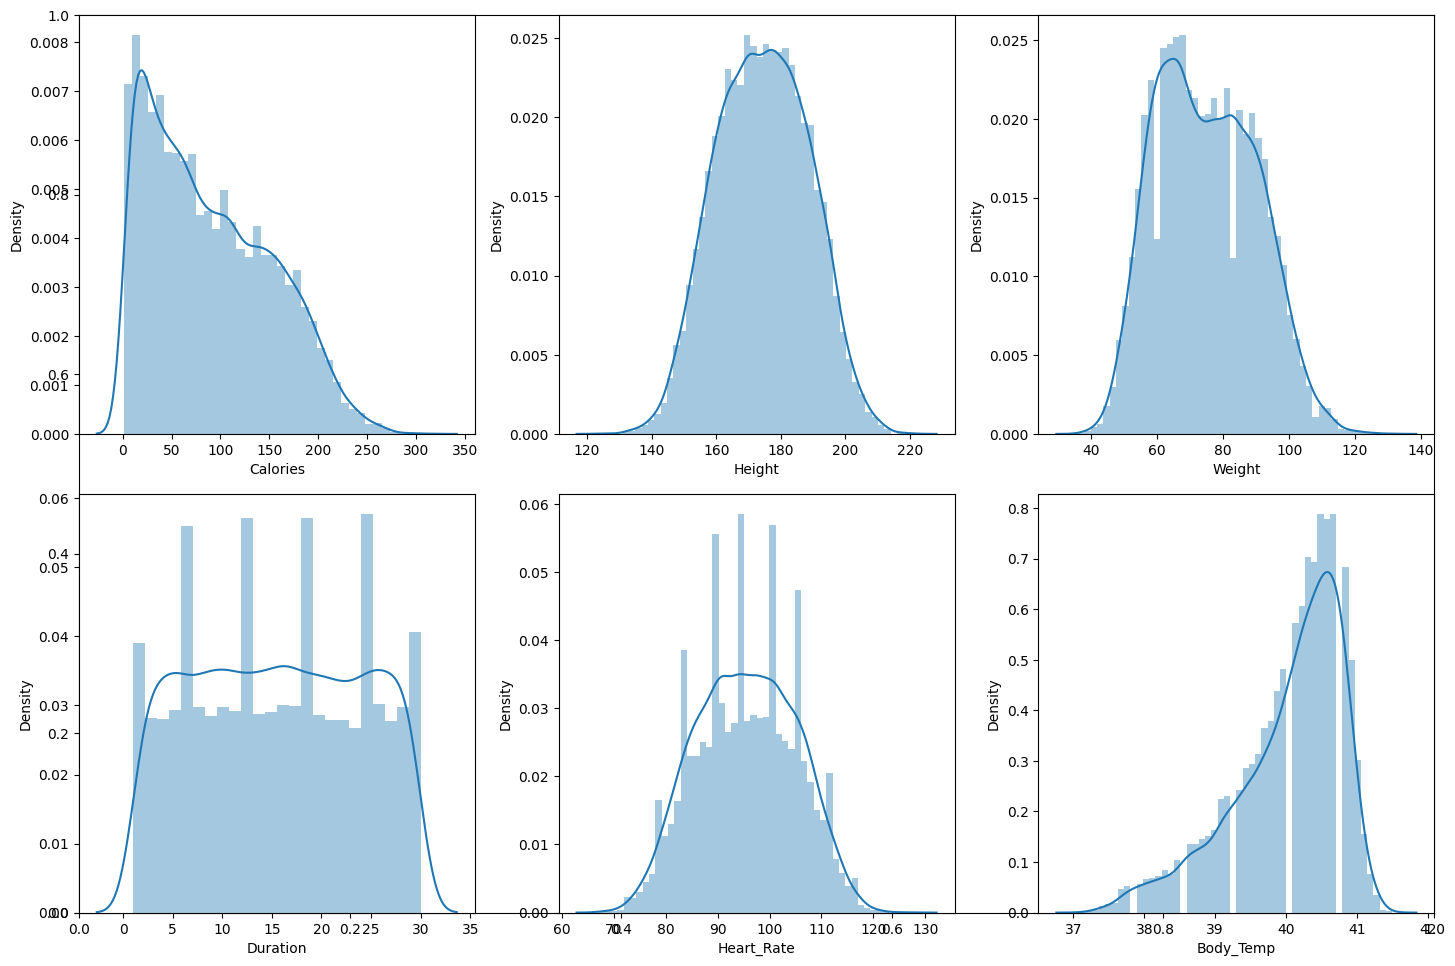

In [10]:
features = df.select_dtypes(include='float').columns

plt.subplots(figsize=(15, 10))
for i, col in enumerate(features):
    plt.subplot(2, 3, i + 1)
    sb.distplot(df[col])
plt.tight_layout()
plt.show()
#The distribution of the continuous features follows close to normal distribution except for some features like Body_Temp and Calories.

In [11]:
df.replace({'male': 0, 'female': 1},
           inplace=True)
df.head()


,User_ID,Calories,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,231.0,14733363,0,68,190.0,94.0,29.0,105.0,40.8
1,14861698,66.0,14861698,1,20,166.0,60.0,14.0,94.0,40.3
2,11179863,26.0,11179863,0,69,179.0,79.0,5.0,88.0,38.7
3,16180408,71.0,16180408,1,34,179.0,71.0,13.0,100.0,40.5
4,17771927,35.0,17771927,1,27,154.0,58.0,10.0,81.0,39.8


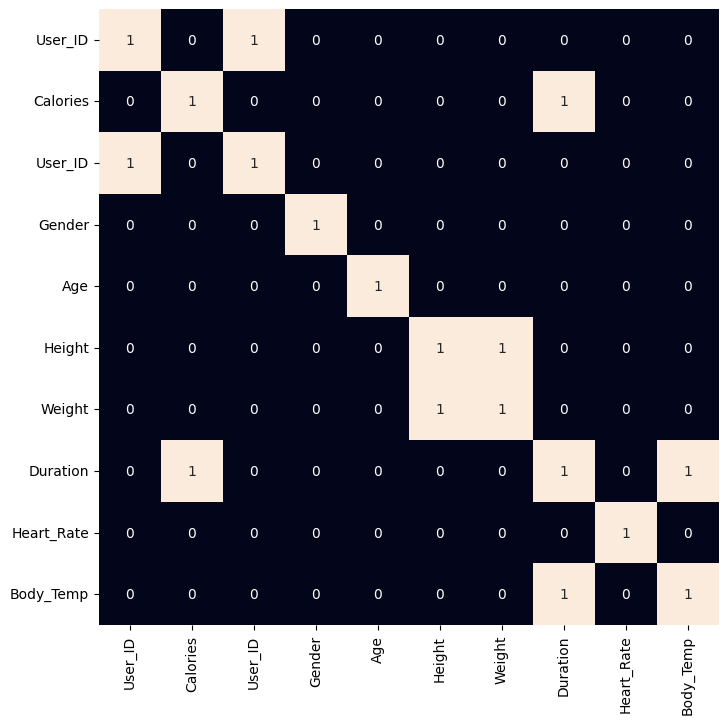

In [12]:
plt.figure(figsize=(8, 8))
sb.heatmap(df.corr() > 0.9,
           annot=True,
           cbar=False)
plt.show()
#When one feature (like "Duration" or "Heart Rate") is very strongly linked to the target ("Calories"), it’s like the model already knows the answer.
#Because of this, during training, the model can just copy the feature to guess the target instead of actually learning properly.
#This is called data leakage — and it makes the model look smart during training but fail badly when used on new, real-world data.

In [13]:
to_remove = ['Weight', 'Duration']
df.drop(to_remove, axis=1, inplace=True)


In [14]:
features = df.drop(['User_ID', 'Calories'], axis=1)
target = df['Calories'].values

X_train, X_val,\
    Y_train, Y_val = train_test_split(features, target,
                                      test_size=0.1,
                                      random_state=22)
X_train.shape, X_val.shape


((13500, 5), (1500, 5))

In [15]:
# Normalizing the features for stable and fast training.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)


In [16]:
from sklearn.metrics import mean_absolute_error as mae
models = [LinearRegression(), XGBRegressor(),
          Lasso(), RandomForestRegressor(), Ridge()]

for i in range(5):
    models[i].fit(X_train, Y_train)

    print(f'{models[i]} : ')

    train_preds = models[i].predict(X_train)
    print('Training Error : ', mae(Y_train, train_preds))

    val_preds = models[i].predict(X_val)
    print('Validation Error : ', mae(Y_val, val_preds))
    print()


LinearRegression() : 
Training Error :  17.893463692619434
Validation Error :  18.007896272831253

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...) : 
Training Error :  7.89463304294701
Validation Error :  10.12050432946533

Lasso() : 
Training Error :  17.915089584958036
Validation Error :  17.995